# Vectorized Diamond-Square algorihm

From Wikipedia https://en.wikipedia.org/wiki/Diamond-square_algorithm:

The diamond-square algorithm begins with a 2D square array of width and height 2n + 1. The four corner points of the array must first be set to initial values. The diamond and square steps are then performed alternately until all array values have been set.

The diamond step: For each square in the array, set the midpoint of that square to be the average of the four corner points plus a random value.

The square step: For each diamond in the array, set the midpoint of that diamond to be the average of the four corner points plus a random value.

At each iteration, the magnitude of the random value should be reduced.

During the square steps, points located on the edges of the array will have only three adjacent values set rather than four. There are a number of ways to handle this complication - the simplest being to take the average of just the three adjacent values. Another option is to 'wrap around', taking the fourth value from the other side of the array. When used with consistent initial corner values this method also allows generated fractals to be stitched together without discontinuities.

![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Testing simple 5x5 grid

Just as in the picture above

In [154]:
n = 5
scale_factor = 10.
z = np.zeros((n,n))

In [155]:
# seed corners
random.seed(52062)

In [156]:
z[0,0] = 1 # random.random()*scale_factor
z[-1,0] = 2 # random.random()*scale_factor
z[0,-1] = 3 # random.random()*scale_factor
z[-1,-1] = 4 # random.random()*scale_factor

In [157]:
z[::n,0], z[-1,0::n], z[::n,-1], z[(n-1)::n,-1], 

(array([1.]), array([2.]), array([3.]), array([4.]))

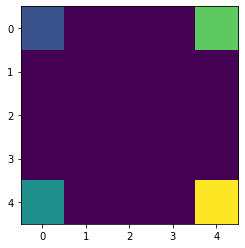

In [158]:
plt.imshow(z)

In [159]:
z[2:-2:3,2:-2:3] = 0.25 * (z[0::n,0] + z[0::n,-1] + z[0,0::n] + z[-1,0::n])

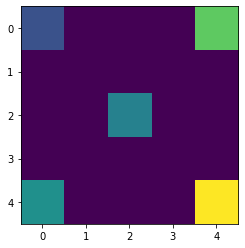

In [160]:
plt.imshow(z)

In [161]:
z[2,2]

1.75

In [162]:
(1+2+3+4)*0.25

2.5

In [163]:
# testing slicing over multiple scales:
((n-1) + n) * (2 * (n-1) +n )

117

## Vectorized DS on non-square grid

Example with 2/1 size ratio, extend later

### Define simple example grid

In [176]:
n = 3
z = np.arange(((n-1) + n) * (2 * (n-1) +n ))
z = z.reshape(((n-1)+n,2*(n-1)+n))

In [165]:
z

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

### Diamond Step: Find Diamond corner positions

In [180]:
# top left
z[:-(n-1):(n-1),:-(n-1):(n-1)]

array([[ 0,  2,  4],
       [14, 16, 18]])

In [167]:
# top right
z[:-(n-1):(n-1),(n-1)::(n-1)]

array([[ 2,  4,  6],
       [16, 18, 20]])

In [168]:
# bottom left
z[(n-1)::(n-1),:-(n-1):(n-1)]

array([[14, 16, 18],
       [28, 30, 32]])

In [170]:
# bottom right
z[(n-1)::(n-1),(n-1)::(n-1)]

array([[16, 18, 20],
       [30, 32, 34]])

### Diamond Step: Find Diamond center positions

In [178]:
z[int((n-1)/2)::(n-1),int((n-1)/2)::(n-1)]

array([[ 8, 10, 12],
       [22, 24, 26]])

### Square step: find edges


![DS_algorithm](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Diamond_Square.svg/1600px-Diamond_Square.svg.png)

#### a) Along borders

In [179]:
z

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

#### Top border

In [205]:
# top border, vals to interp
z[0,int((n-1)/2)::(n-1)]

array([1, 3, 5])

In [210]:
# top border, left
z[0,:-(n-1):(n-1)]

array([0, 2, 4])

In [211]:
# top border, right
z[0,(n-1)::(n-1)]

array([2, 4, 6])

In [214]:
# top border, bottom
z[int((n-1)/2),int((n-1)/2)::(n-1)]

array([ 8, 10, 12])

#### Bottom border

In [216]:
z

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [217]:
# bottom border, vals to interp
z[-1,int((n-1)/2)::(n-1)]

array([29, 31, 33])

In [218]:
# bottom border, left
z[-1,:-(n-1):(n-1)]

array([28, 30, 32])

In [219]:
# bottom border, right
z[-1,(n-1)::(n-1)]

array([30, 32, 34])

In [222]:
# bottom border, bottom
z[-int((n-1)/2)-1,int((n-1)/2)::(n-1)]

array([22, 24, 26])

#### Left border

In [223]:
z

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [224]:
# left border, vals to interp
z[int((n-1)/2)::(n-1),0]

array([ 7, 21])

In [229]:
# left border, top
z[:-(n-1):(n-1),0]

array([ 0, 14])

In [227]:
# left border, bottom
z[(n-1)::(n-1),0]

array([14, 28])

In [231]:
# bottom border, right
z[int((n-1)/2)::(n-1),int((n-1)/2)]

array([ 8, 22])

#### Right

In [223]:
z

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [232]:
# left border, vals to interp
z[int((n-1)/2)::(n-1),-1]

array([13, 27])

In [233]:
# left border, top
z[:-(n-1):(n-1),-1]

array([ 6, 20])

In [234]:
# left border, bottom
z[(n-1)::(n-1),-1]

array([20, 34])

In [235]:
# bottom border, right
z[int((n-1)/2)::(n-1),-int((n-1)/2)-1]

array([12, 26])

In [188]:
# left
z[int((n-1)/2)::(n-1),:-int((n-1)/2):(n-1)]

array([[ 7,  9, 11],
       [21, 23, 25]])

In [193]:
# right
z[int((n-1)/2)::(n-1),(n-1)::(n-1)]

array([[ 9, 11, 13],
       [23, 25, 27]])

In [196]:
# top
z[:-int((n-1)/2):(n-1),int((n-1)/2)::(n-1)]

array([[ 1,  3,  5],
       [15, 17, 19]])

In [199]:
# bottom
z[(n-1)::(n-1),int((n-1)/2)::(n-1)]

array([[15, 17, 19],
       [29, 31, 33]])

### Diamond-step: find midpoints

In [200]:
z

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

### Interpolate

### Scale

Note: using non-wrapped scaling, i.e.: at edges division by 3, else by 4.

For vectorization, we create a "division grid" with corresponding values: